# Imported Library

In [0]:
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# Helping Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Build CNN Model

In [0]:
#CNN BASED MODEL

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics =['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

# Training and Validation Generator 

In [0]:
# Train From Scratch
train_datagen = image.ImageDataGenerator(
        rescale = 1. / 255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)



In [33]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [34]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [35]:

validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [36]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [37]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 85s 11s/step - loss: 1.1978 - accuracy: 0.5273 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 77s 10s/step - loss: 0.6255 - accuracy: 0.6758 - val_loss: 0.5358 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 77s 10s/step - loss: 0.3942 - accuracy: 0.8242 - val_loss: 0.1386 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 80s 10s/step - loss: 0.3886 - accuracy: 0.8555 - val_loss: 0.3376 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 76s 10s/step - loss: 0.3013 - accuracy: 0.8828 - val_loss: 0.2384 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 77s 10s/step - loss: 0.2128 - accuracy: 0.9141 - val_loss: 0.1150 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 83s 10s/step - loss: 0.2433 - accuracy: 0.8945 - val_loss: 0.1665 - val_accuracy: 0.9667
Epoch 8/10
8/8 [===========

# Plotting Graph

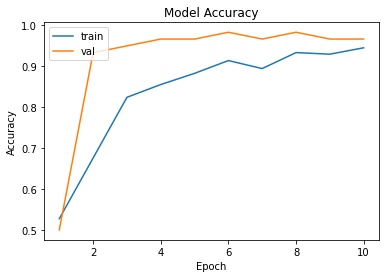

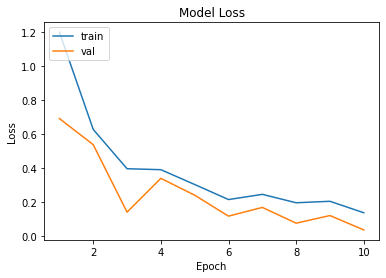

In [38]:
# Plotting training & Validation accuracy
epoch_range = range(1,11)
plt.plot(epoch_range,hist.history['accuracy'])
plt.plot(epoch_range,hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train","val"],loc='upper left')
plt.show()


#Plotting Training & Validation Loss

plt.plot(epoch_range,hist.history['loss'])
plt.plot(epoch_range,hist.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train","val"],loc='upper left')
plt.show()

# Evaluating The Model

In [0]:
# LOSS IS VERY LESS 
model.save("model_adv.h5")

In [40]:
model.evaluate_generator(train_generator)

[0.09762220829725266, 0.9508928656578064]

In [41]:
model.evaluate_generator(validation_generator)

[0.10871284455060959, 0.9666666388511658]

In [0]:
# Test Image

In [0]:
import os

In [0]:
test_y = []
predict_y = []


In [0]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    predict_y.append(p[0,0])
    test_y.append(0)

In [0]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    predict_y.append(p[0,0])
    test_y.append(1)


In [47]:
test_y = np.array(test_y)
predict_y = np.array(predict_y)
test_y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
predict_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int32)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [50]:
cm = confusion_matrix(test_y,predict_y)
cm


array([[30,  0],
       [ 2, 28]])

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f093c8fb940>)

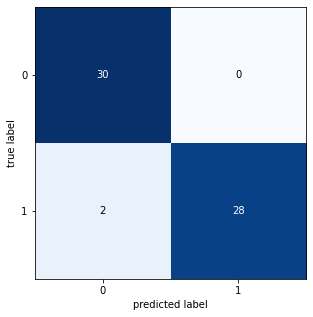

In [51]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm,figsize=(5,5))